#📌 Extracción

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

datos = pd.read_json('/content/TelecomX_Data.json')

In [202]:
datos.shape

(7267, 6)

In [203]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [204]:
import numpy as np

def tiene_dict(s):
    return s.apply(lambda x: isinstance(x, dict)).any()

def tiene_list(s):
    return s.apply(lambda x: isinstance(x, list)).any()

cols_dict = [c for c in datos.columns if tiene_dict(datos[c])]
cols_list = [c for c in datos.columns if tiene_list(datos[c])]
cols_dict, cols_list


(['customer', 'phone', 'internet', 'account'], [])

In [205]:
for c in cols_dict:
    # normaliza la columna dict a columnas nuevas con prefijo "c."
    expand = pd.json_normalize(datos[c]).add_prefix(f"{c}.")
    datos = datos.drop(columns=c).join(expand)


In [206]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [207]:
type(datos)

pandas.core.frame.DataFrame

#🔧 Transformación

In [208]:
#Comprobando tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [209]:
#Verificando si existen NULLS
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [210]:
#Sumar columnas numericas
suma_cols = datos.sum(numeric_only=True)
suma_cols
#Se observa que la variable Charge.Total no suma

,0
customer.SeniorCitizen,1182.00
customer.tenure,235062.00
account.Charges.Monthly,470320.95


In [211]:
datos['account.Charges.Total'].sum()

'593.3542.4280.851237.85267.4571.457904.255377.8340.355957.92460.558456.75351.57261.252560.16849.41993.272.12791.525.11306.31215.61849.9557.276.3530.55656.751090.6471.851396.9929.33247.55900.97942.151343.4825.41070.154959.65597.65224.5192991.12078.95630.616111242.456316.2727.85353244.32607.65567.553767.43673.64036.851120.3314.551888.45529.87308.956252.72878.551212.18182.8519.8599.752861.451442.24059.354145.93645.5187.752317.11448.82193.651355.11748.9511.255526.751553.9511476747.35865.055976.9181.653268.051052.47634.2580.263.75190.52401.05511.253949.152362.170.91696.21152.7287.858496.7470.21564.41847.553694.7584017.456825.658309.55605.451972.3533.7844.452111.36205.5855.3633.85474.95848.66471.858127.6676.35864.26049.51582.75198.11098.854039.32438.67113.75576.65371.9167.3219.5273.42555.05223.15165.589.3235.051144.64908.252298.93789.275.947652196.385.551444.655405.86339.33847.6673319.750.16140.853870.37624.24354.453431.752227.12045.551929.35268.45181.5651.43486.651389.62303.351522.76717.98

In [212]:
from os import replace

import pandas as pd

# si los valores traen espacios/comas como separadores
datos['account.Charges.Total'] = (
    datos['account.Charges.Total']
      .astype(str)
      .str.replace(' ', '', regex=False)     # quita espacios
      .str.replace(',', '', regex=False)     # quita comas (miles)
      # .str.replace(',', '.', regex=False)  # ← usa esta línea en vez de la anterior si la coma es decimal
      .str.strip()
)

datos['account.Charges.Total'] = pd.to_numeric(
    datos['account.Charges.Total'], errors='coerce'
)


In [213]:
datos.sum(numeric_only=True)

,0
customer.SeniorCitizen,1182.00
customer.tenure,235062.00
account.Charges.Monthly,470320.95
account.Charges.Total,16548281.85


In [214]:
n=datos['account.Charges.Total'].isnull().sum()
n

np.int64(11)

In [215]:
#Revisando vacios
vacios=datos.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(vacios[vacios > 0])


Churn    224
dtype: int64


In [216]:
#Reemplazando vacios por null
import numpy as np

# Reemplazar cadenas vacías o espacios por NaN en toda la tabla
datos= datos.replace(r'^\s*$', np.nan, regex=True)


##Coherencia de los Datos
* Ver si cuenta con NAs
* Si los valores númericos son todos positivos
* Si el ID contiene valor único para cada registro

In [217]:
#Contando los null por variables
z=datos.isnull().sum()
print(z[z > 0])
#Solo dos variables cuentan con vacios "Churn" y "Charges.Total"

Churn                    224
account.Charges.Total     11
dtype: int64


In [218]:
#Verificar si existen valores únicos en ID, para ello buscaremos duplicados

duplicados =(
    datos
    .groupby("customerID")
    .size()
    .reset_index(name="conteo")
)

dupicados =duplicados[duplicados["conteo"]> 1]
#Como no retorna ningun valro mayor a 1, significa que todos los ID son unicos


##¿Cuáles son los valores únicos de cada variable, es decir que valores puede tomar la variable?

In [219]:
 for col in datos.columns:
    if col != "customerID":
        print(f"\nColumna: {col}")
        print(datos[col].unique())



Columna: Churn
['No' 'Yes' nan]

Columna: customer.gender
['Female' 'Male']

Columna: customer.SeniorCitizen
[0 1]

Columna: customer.Partner
['Yes' 'No']

Columna: customer.Dependents
['Yes' 'No']

Columna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: phone.PhoneService
['Yes' 'No']

Columna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Columna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Columna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Columna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Columna: internet.TechSupport
['Yes' 'No' 'No internet service']

Columna: internet.StreamingTV
['Yes' 'No' 'No internet service']

Columna: internet.StreamingMovies
['No' 'Yes'

## Columna de cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [220]:
datos["Cuentas_Diarias"]=datos["account.Charges.Monthly"]/30
datos["Cuentas_Diarias"].head()

,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


##Estandarización y transformación de datos (opcional)
Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [221]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [222]:
#Renombrando variables
datos.columns=["id","churn","genero","mayor_65","con_pareja","dependientes","meses_contrato","sus_tel",
               "multi_lines","internet","seguridad_online","respaldo","prote_disp","soporte_tec","tv",
               "pelis","tipo_contrato","factura_online","metodo_pago","total_mes","total","total_diario"]


In [223]:
datos.columns

Index(['id', 'churn', 'genero', 'mayor_65', 'con_pareja', 'dependientes',
       'meses_contrato', 'sus_tel', 'multi_lines', 'internet',
       'seguridad_online', 'respaldo', 'prote_disp', 'soporte_tec', 'tv',
       'pelis', 'tipo_contrato', 'factura_online', 'metodo_pago', 'total_mes',
       'total', 'total_diario'],
      dtype='object')

## Cambiando valores por ceros y unos

In [224]:
# Se toma como 1 "Yes", todo caso contrario sería 0
vars_yes_no=["churn","con_pareja","dependientes","sus_tel",
               "multi_lines","seguridad_online","respaldo","prote_disp","soporte_tec","tv",
               "pelis","factura_online"]

for c in vars_yes_no:
    datos[c] = (datos[c] == "Yes").astype(int)

In [225]:
for col in datos.columns:
    if col != "id":
        print(f"\nColumna: {col}")
        print(datos[col].unique())



Columna: churn
[0 1]

Columna: genero
['Female' 'Male']

Columna: mayor_65
[0 1]

Columna: con_pareja
[1 0]

Columna: dependientes
[1 0]

Columna: meses_contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: sus_tel
[1 0]

Columna: multi_lines
[0 1]

Columna: internet
['DSL' 'Fiber optic' 'No']

Columna: seguridad_online
[0 1]

Columna: respaldo
[1 0]

Columna: prote_disp
[0 1]

Columna: soporte_tec
[1 0]

Columna: tv
[1 0]

Columna: pelis
[0 1]

Columna: tipo_contrato
['One year' 'Month-to-month' 'Two year']

Columna: factura_online
[1 0]

Columna: metodo_pago
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Columna: total_mes
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

Columna: total
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]

Columna: total_diar

#📊 Carga y análisis

## Análisis Descriptivo
Cálculo de media, medianda, desviación estándar

In [226]:
datos.describe()

,churn,mayor_65,con_pareja,dependientes,meses_contrato,sus_tel,multi_lines,seguridad_online,respaldo,prote_disp,soporte_tec,tv,pelis,factura_online,total_mes,total,total_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [227]:
datos.median(numeric_only=True)

,0
churn,0.000000
mayor_65,0.000000
con_pareja,0.000000
dependientes,0.000000
meses_contrato,29.000000
sus_tel,1.000000
multi_lines,0.000000
seguridad_online,0.000000
respaldo,0.000000
prote_disp,0.000000


## Distribución de Churn (Evasión)

Se puede observar que el 26.54% de los clientes dejaron la empresa, mientras que el 73.46% permanece.


In [228]:
dist_churn = round(datos['churn'].value_counts(normalize=True)*100,2)
dist_churn

,proportion
churn,
0,74.28
1,25.72


##Eliminando variables que no se necesitan

In [229]:
#Eliminar ID
datos=datos.drop("id", axis=1)
datos.columns

Index(['churn', 'genero', 'mayor_65', 'con_pareja', 'dependientes',
       'meses_contrato', 'sus_tel', 'multi_lines', 'internet',
       'seguridad_online', 'respaldo', 'prote_disp', 'soporte_tec', 'tv',
       'pelis', 'tipo_contrato', 'factura_online', 'metodo_pago', 'total_mes',
       'total', 'total_diario'],
      dtype='object')

##Encoding

Transformar variables categoricas a númericas

In [230]:
#One hot, codificación binaria

datos_cod = pd.get_dummies(datos, columns=[
    'genero','internet',
       'seguridad_online', 'respaldo', 'prote_disp', 'soporte_tec', 'tv',
       'pelis', 'tipo_contrato','metodo_pago'],drop_first=True)


In [231]:
datos_cod.head()

,churn,mayor_65,con_pareja,dependientes,meses_contrato,sus_tel,multi_lines,factura_online,total_mes,total,...,respaldo_1,prote_disp_1,soporte_tec_1,tv_1,pelis_1,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,0,0,1,1,9,1,0,1,65.6,593.30,...,True,False,True,True,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,0,1,73.9,280.85,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,0,1,98.0,1237.85,...,True,True,False,True,True,False,False,False,True,False
4,1,1,1,0,3,1,0,1,83.9,267.40,...,False,False,True,True,False,False,False,False,False,True


##Verificación de la Proporción de Cancelación (Churn)



In [232]:
p = round(datos['churn'].value_counts(normalize=True)*100,2)
p

,proportion
churn,
0,74.28
1,25.72


## Normalización o Estandarización

In [233]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Variables categóricas y numéricas
categorical_features = [
    "genero", "mayor_65", "con_pareja", "dependientes",
    "sus_tel", "multi_lines", "internet",
    "seguridad_online", "respaldo", "prote_disp",
    "soporte_tec", "tv", "pelis",
    "tipo_contrato", "factura_online", "metodo_pago"
]

numeric_features = [
    "meses_contrato", "total_mes",
    "total", "total_diario"
]

# Preprocesador: escala numéricas y codifica categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"  # deja el resto de columnas tal cual
)

# ✅ Ejemplo 1: Pipeline con Regresión Logística (requiere escala)
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# ✅ Ejemplo 2: Pipeline con Random Forest (no requiere escala, pero no le molesta)
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])


#Correlación y Selección de Variable

## Correlación

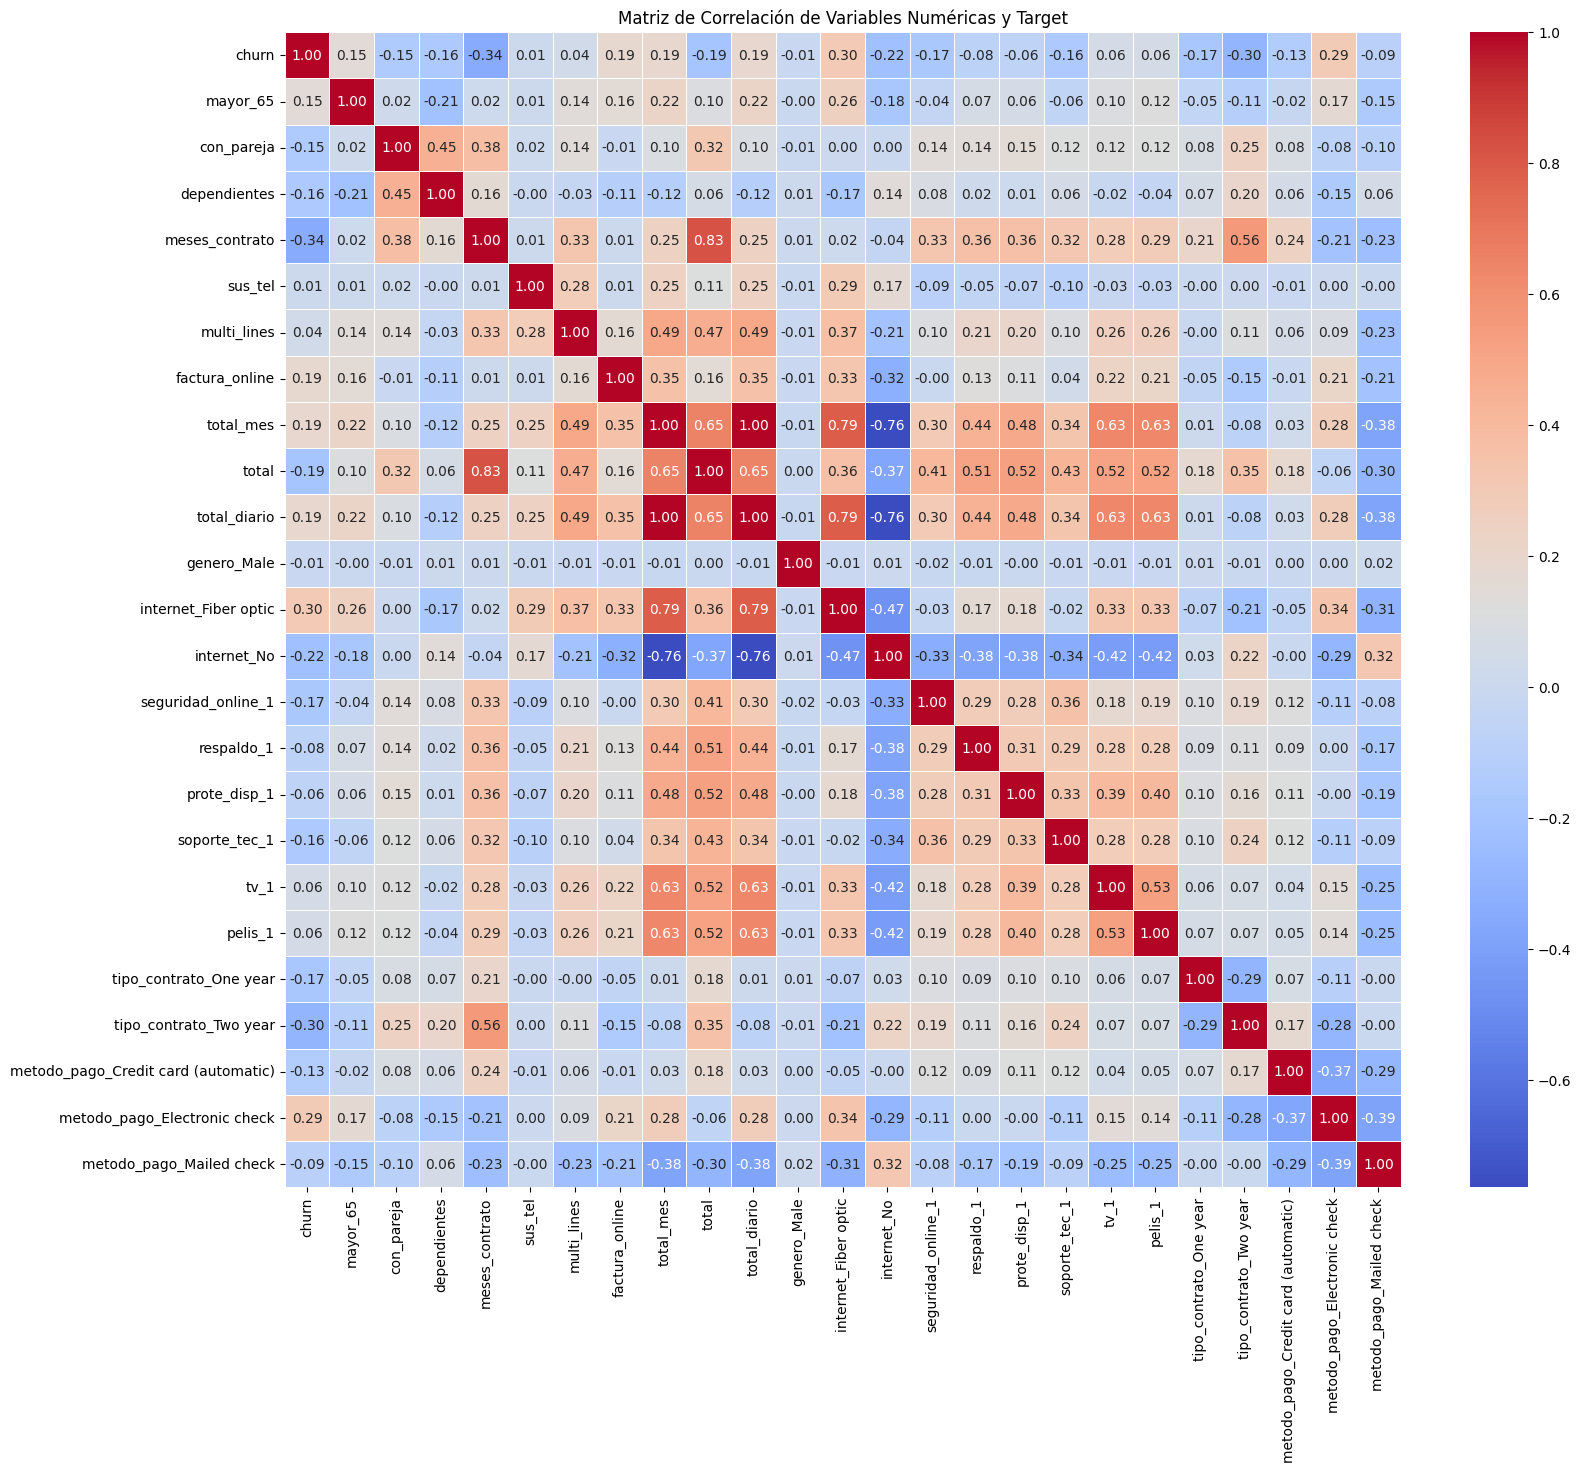


Correlación con la variable 'churn':
churn                                  1.000000
internet_Fiber optic                   0.300949
metodo_pago_Electronic check           0.294626
total_diario                           0.189866
total_mes                              0.189866
factura_online                         0.186666
mayor_65                               0.146733
tv_1                                   0.062430
pelis_1                                0.060586
multi_lines                            0.039343
sus_tel                                0.012571
genero_Male                           -0.009555
prote_disp_1                          -0.063452
respaldo_1                            -0.080163
metodo_pago_Mailed check              -0.090061
metodo_pago_Credit card (automatic)   -0.131085
con_pareja                            -0.148546
soporte_tec_1                         -0.160440
dependientes                          -0.161384
seguridad_online_1                    -0.166828
ti

In [234]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = datos_cod.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

# To specifically look at correlations with 'Churn_yes':
print("\nCorrelación con la variable 'churn':")
print(correlation_matrix['churn'].sort_values(ascending=False))

## Análisis Dirigido

### Tiempo de contrato

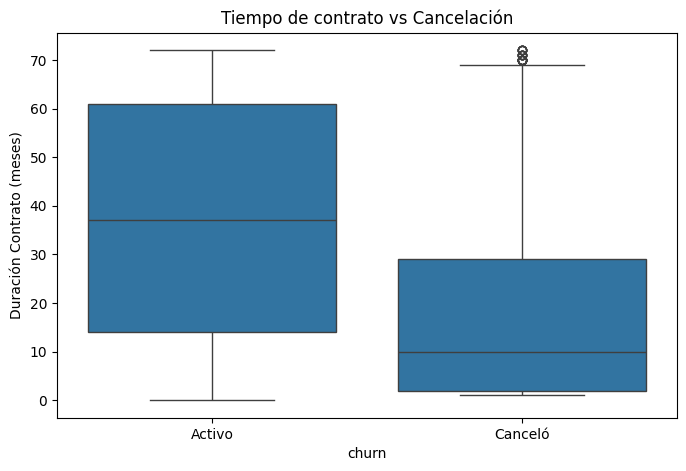

In [235]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="meses_contrato", data=datos)
plt.xticks([0,1], ["Activo", "Canceló"])
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Duración Contrato (meses)")
plt.show()

### Gasto Total

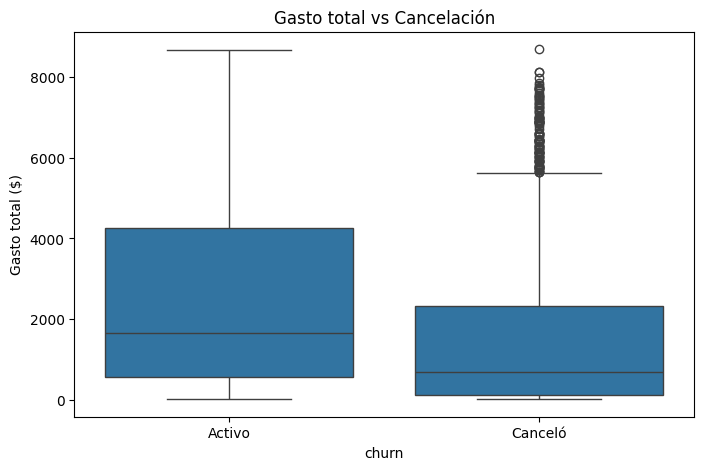

In [236]:

plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="total", data=datos)
plt.xticks([0,1], ["Activo", "Canceló"])
plt.title("Gasto total vs Cancelación")
plt.ylabel("Gasto total ($)")
plt.show()

#Modelo Predictivo

In [237]:

datos["total"] = datos["total"].fillna(0)


## Separación de datos

In [238]:
## Dividir datos de entrenamiento y prueba, 70% y 30% respectivamente
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = datos.drop(columns=["churn"])
y = datos["churn"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 30% para prueba
    random_state=46,     # para reproducibilidad
    stratify=y
)

# Verificación de tamaños
print("Entrenamiento:", X_train.shape[0])
print("Prueba:", X_test.shape[0])

# Verificación de proporción de clases
print("\nProporción de clases en train:")
print(y_train.value_counts(normalize=True))
print("\nProporción de clases en test:")
print(y_test.value_counts(normalize=True))

Entrenamiento: 5450
Prueba: 1817

Proporción de clases en train:
churn
0    0.742752
1    0.257248
Name: proportion, dtype: float64

Proporción de clases en test:
churn
0    0.742983
1    0.257017
Name: proportion, dtype: float64


##Creación de Modelos

In [239]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Columnas categóricas y numéricas
categorical_vars = [
     "genero", "mayor_65", "con_pareja", "dependientes",
    "sus_tel", "multi_lines", "internet",
    "seguridad_online", "respaldo", "prote_disp",
    "soporte_tec", "tv", "pelis",
    "tipo_contrato", "factura_online", "metodo_pago"
]

numeric_vars= [
    "meses_contrato", "total_mes",
    "total", "total_diario"
]

# Preprocesamiento: escala numéricas + one-hot encoding para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_vars),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_vars)
    ]
)

# Pipeline Regresión Logística
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenamiento
pipeline_lr.fit(X_train, y_train)

# Predicción
y_pred_lr = pipeline_lr.predict(X_test)

## Evaluación de los Modelos

In [240]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

categorical_vars = [
     "genero", "mayor_65", "con_pareja", "dependientes",
    "sus_tel", "multi_lines", "internet",
    "seguridad_online", "respaldo", "prote_disp",
    "soporte_tec", "tv", "pelis",
    "tipo_contrato", "factura_online", "metodo_pago"
]

numeric_vars= [
    "meses_contrato", "total_mes",
    "total", "total_diario"
]

Evaluación

In [255]:
def evaluar_modelo(y_true, y_pred, modelo_nombre):
    print(f"--- Evaluación {modelo_nombre} ---")
    print("Exactitud (Accuracy):", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Activo","Canceló"])
    disp.plot(cmap="viridis")


### Regresión Logistica

--- Evaluación Regresión Logística ---
Exactitud (Accuracy): 0.769
Precisión: 0.532
Recall: 0.833
F1-Score: 0.649


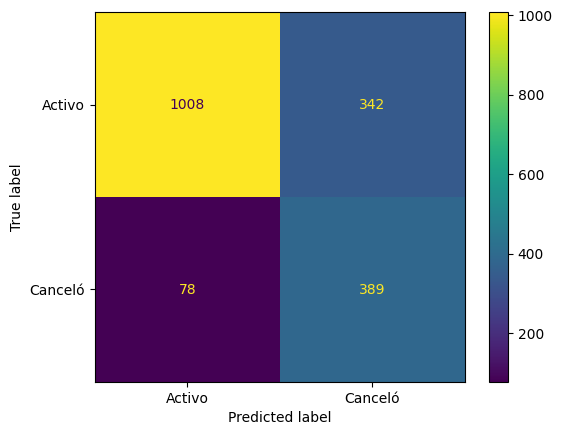

In [256]:

preprocessor_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Entrenar y predecir
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

### Random Forest

In [244]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor_rf),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

### Entrenemiento para predecir

--- Evaluación Random Forest ---
Exactitud (Accuracy): 0.798
Precisión: 0.65
Recall: 0.465
F1-Score: 0.542


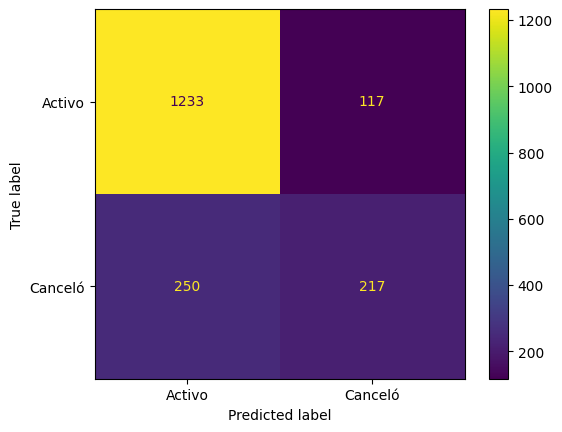

In [245]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


In [246]:

# Obtener nombres de columnas después del preprocesamiento
ohe = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, ohe_features])

# Coeficientes del modelo
coeficientes = pipeline_lr.named_steps['classifier'].coef_[0]
importancia_lr = pd.DataFrame({"Variable": all_features, "Coeficiente": coeficientes})
importancia_lr["Valor Absoluto"] = importancia_lr["Coeficiente"].abs()
importancia_lr.sort_values(by="Valor Absoluto", ascending=False, inplace=True)
print(importancia_lr.head(10))

                        Variable  Coeficiente  Valor Absoluto
0                 meses_contrato    -1.202018        1.202018
19        tipo_contrato_Two year    -1.176843        1.176843
11                   internet_No    -1.029659        1.029659
10          internet_Fiber optic     0.860990        0.860990
18        tipo_contrato_One year    -0.623772        0.623772
2                          total     0.520542        0.520542
8                      sus_tel_1    -0.451589        0.451589
12            seguridad_online_1    -0.365812        0.365812
22  metodo_pago_Electronic check     0.330881        0.330881
15                 soporte_tec_1    -0.313622        0.313622


In [247]:
# Transformar los datos de entrenamiento con el preprocesador del pipeline
X_train_transformed = pipeline_rf.named_steps['preprocessor'].transform(X_train)

# Obtener número total de columnas después de la transformación
n_features = X_train_transformed.shape[1]

# Crear nombres genéricos para todas las columnas (ya que el preprocesador mezcla)
all_features_rf = [f"feat_{i}" for i in range(n_features)]

# Crear DataFrame con importancias
importancia_rf = pd.DataFrame({
    "Variable": all_features_rf,
    "Importancia": pipeline_rf.named_steps['classifier'].feature_importances_
})
importancia_rf.sort_values(by="Importancia", ascending=False, inplace=True)
print(importancia_rf.head(10))

   Variable  Importancia
20  feat_20     0.152905
22  feat_22     0.151648
21  feat_21     0.134467
23  feat_23     0.131920
15  feat_15     0.054086
6    feat_6     0.041507
18  feat_18     0.035876
14  feat_14     0.026697
0    feat_0     0.023812
8    feat_8     0.023546


### Variables Regresión Logistica

/tmp/ipython-input-2430102519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Valor Absoluto", y="Variable", data=top10_lr, palette="Purples")


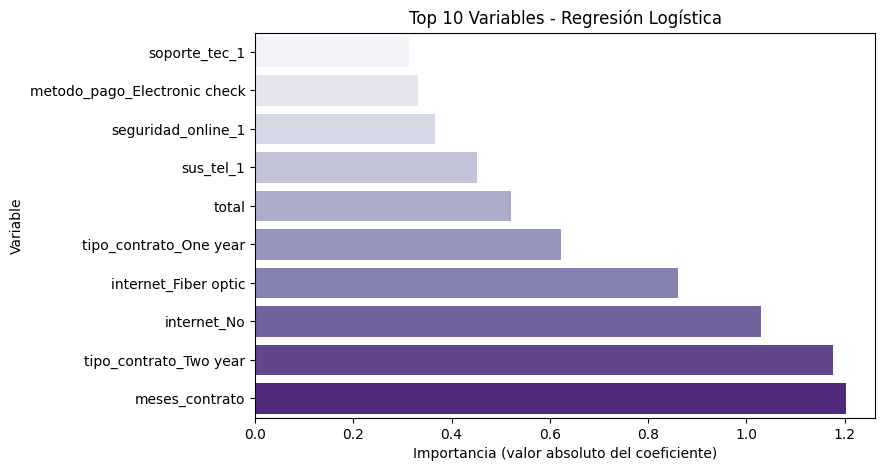

In [253]:

top10_lr = importancia_lr.head(10).sort_values("Valor Absoluto")

plt.figure(figsize=(8,5))
sns.barplot(x="Valor Absoluto", y="Variable", data=top10_lr, palette="Purples")
plt.title("Top 10 Variables - Regresión Logística")
plt.xlabel("Importancia (valor absoluto del coeficiente)")
plt.show()

### Variables Random Forest

/tmp/ipython-input-2372550969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=top10_rf, palette="BuPu")


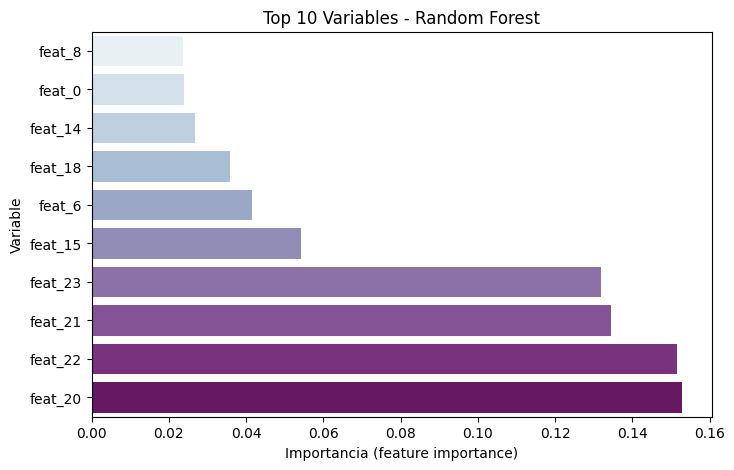

In [254]:

top10_rf = importancia_rf.head(10).sort_values("Importancia", ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=top10_rf, palette="BuPu")
plt.title("Top 10 Variables - Random Forest")
plt.xlabel("Importancia (feature importance)")
plt.show()

#📄Interpretación y Conclusiones


Se realizarón dos tipos de modelos:
1. Regresión Logística
2. Random Forest

De la Regresión Logistica se destacan las sigueintes variables:



In [260]:
import pandas as pd
import numpy as np

modelo = pipeline_lr.named_steps["classifier"]

# Sacamos el preprocesador
preprocessor = pipeline_lr.named_steps["preprocessor"]

# Nombres de variables numéricas
num_features = numeric_features

# Nombres de variables categóricas expandidas (dummies)
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

# Concatenar todas las variables finales
feature_names = list(num_features) + list(cat_features)


coef = modelo.coef_[0]  # Coeficientes
intercept = modelo.intercept_[0]  # Intercepto

df_coef = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente (log-odds)": coef,
    "Odds Ratio": np.exp(coef)
})

print("Intercepto:", intercept)
df_coef.head()


Intercepto: -0.297842828610157


,Variable,Coeficiente (log-odds),Odds Ratio
0,meses_contrato,-1.202018,0.300587
1,total_mes,-0.101421,0.903553
2,total,0.520542,1.682940
3,total_diario,-0.101421,0.903553
4,genero_Male,-0.000216,0.999784


### Interpretación de variables de la regresión logistica

| Variable            | Coef. (log-odds) | Odds Ratio | Interpretación                                                                                              |
| ------------------- | ---------------- | ---------- | ----------------------------------------------------------------------------------------------------------- |
| **meses\_contrato** | -1.202018        | 0.30       | Por cada mes adicional de contrato, las odds del evento se reducen aprox. **70%**. Fuerte efecto protector. |
| **total\_mes**      | -0.101421        | 0.90       | A medida que aumenta el gasto mensual, las odds del evento bajan \~**10%** por unidad.                      |
| **total**           | 0.520542         | 1.68       | Un aumento en el total está asociado con **68% más odds** de que ocurra el evento.                          |
| **total\_diario**   | -0.101421        | 0.90       | Similar a `total_mes`: reduce las odds un **10%**.                                                          |
| **genero\_Male**    | -0.000216        | 0.9998     | Ser hombre casi no cambia nada respecto a la categoría base (efecto despreciable).                          |


Del Random Forest, las variables más influyentes son: factura online, metodo de pago; electronic, credit, mailed

In [257]:
# Obtener nombres de features
num_features = numeric_features
cat_features = pipeline_rf.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)

feature_names = list(num_features) + list(cat_features)

# DataFrame con nombres reales
importancia_rf = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": pipeline_rf.named_steps['classifier'].feature_importances_
})

importancia_rf.sort_values(by="Importancia", ascending=False, inplace=True)
print(importancia_rf.head(10))


                               Variable  Importancia
20                     factura_online_1     0.152905
22         metodo_pago_Electronic check     0.151648
21  metodo_pago_Credit card (automatic)     0.134467
23             metodo_pago_Mailed check     0.131920
15                        soporte_tec_1     0.054086
6                          con_pareja_1     0.041507
18               tipo_contrato_One year     0.035876
14                         prote_disp_1     0.026697
0                        meses_contrato     0.023812
8                             sus_tel_1     0.023546


### 📊 1. Lo que dice la Regresión Logística

De tu salida anterior:

meses_contrato → coeficiente negativo fuerte (OR ≈ 0.30): a más tiempo de contrato, menos probabilidad de cancelar.

total → coeficiente positivo (OR ≈ 1.68): a mayor gasto total, mayor probabilidad de cancelar.

total_mes / total_diario → efecto pequeño y negativo (OR ≈ 0.90).

género → sin efecto relevante (OR ≈ 1).

👉 La logística te dice qué variables afectan y en qué dirección, pero no si hay interacciones complejas.

### 🌳 2. Lo que dice el Random Forest

De tu tabla de importancias:

Variables de método de pago destacan:

factura_online_1, metodo_pago_Electronic check, metodo_pago_Credit card (automatic), metodo_pago_Mailed check.

Esto indica que la forma en que pagan los clientes es muy influyente en si se quedan o cancelan.

Otras importantes:

soporte_tec_1 → tener soporte técnico influye.

con_pareja_1 → situación familiar también aporta.

tipo_contrato_One year y meses_contrato → tipo/duración del contrato afectan.

sus_tel_1 y prote_disp_1 → servicios adicionales también suman.

👉 El bosque te dice qué variables son más útiles para predecir, aunque no indica dirección (+ o –).

### 🔎 3. Conclusión Integrada

Si juntas ambos modelos:

Duración del contrato (meses_contrato, tipo_contrato)

Logística: contratos largos reducen fuertemente la probabilidad de cancelar.

RF: confirma que la duración del contrato es clave.
Conclusión: la permanencia está fuertemente asociada a contratos largos.

Método de pago / factura electrónica

RF lo resalta como de las variables más importantes.

La logística no lo mostró fuerte en tu tabla, pero eso puede ser porque esas dummies específicas no salieron tan significativas individualmente.
Conclusión: la forma de pago es un gran predictor de cancelación. Probablemente quienes usan electronic check o mailed check cancelan más.

Monto facturado (total, total_mes)

Logística: más gasto total → más riesgo de cancelar.

RF: no aparece en el top, pero puede estar diluido entre varias transformaciones.
Conclusión: clientes con facturación más alta parecen más sensibles al churn.

Servicios adicionales (soporte técnico, protección de dispositivo, sus_tel)

RF: tienen peso.

Logística: no resaltaron tanto.
Conclusión: los extras aportan valor predictivo, quizá porque diferencian perfiles de clientes.

Variables demográficas simples (género, con_pareja)

Efectos menores.
Conclusión: no son drivers principales.

### 🚀 Resumen Final

Lo que más reduce cancelación: contratos más largos.

Lo que más incrementa cancelación: ciertos métodos de pago y facturación elevada.

Otros factores: soporte técnico y servicios adicionales ayudan a explicar diferencias, pero con menor peso.

👉 En términos de negocio: fomentar contratos de más largo plazo y métodos de pago más estables (ej. tarjeta automática) podría reducir churn.